# Customer Categorization of a Telecommunications Provider using KNN 

## About the dataset

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

## Libraries

In [86]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

Let's download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.

In [4]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2024-04-18 13:38:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: 'teleCust1000t.csv'

     0K .......... .......... .......... .....                100%  185K=0.2s

2024-04-18 13:38:47 (185 KB/s) - 'teleCust1000t.csv' saved [36047/36047]



## Load data from CSV file

In [13]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data visualization and analysis

Lets see how many of each class is in our data set

In [6]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

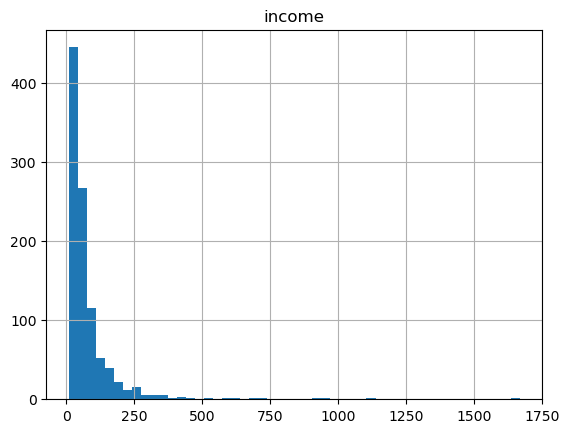

In [17]:
df.hist(column = 'income', bins = 50)

In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [27]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [67]:
Y = df['custcat'].values
Y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data

In [62]:
print(X[0:5])
scaler = preprocessing.StandardScaler().fit(X)
nX = scaler.transform(X.astype(float))
print(nX[0:5])


[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]
 [  2.  33.  33.   0.  12.  33.   2.   0.   0.   1.   1.]
 [  2.  23.  30.   1.   9.  30.   1.   2.   0.   0.   4.]]
[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


## Train Test Split

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(nX, Y, test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification

### K nearest neighbor (KNN)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
k = 4
#Train Model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [78]:
#Prediction
yhat = neigh.predict(X_test)
print(yhat[0:5])
print(Y[0:5])

[1 1 3 2 4]
[1 4 3 1 3]


In [79]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


### K nearest neighbors with the Different range of K 

In [112]:
ks = 10
mean_acc = np.zeros((ks - 1))
std_acc = np.zeros((ks - 1))

for n in range(1,ks):
    #Train model and predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    std_acc[n-1] = np.std(yhat == Y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

Text(0.5, 0, 'Number of Neighbors (K)')

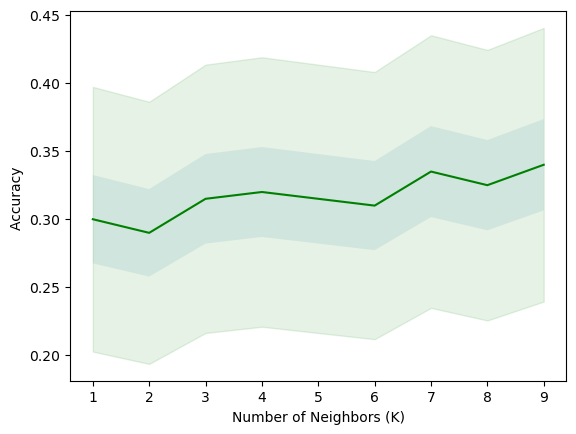

In [113]:
#Plot the model accuracy for diffirent number of neighbors
plt.plot(range(1,ks), mean_acc, 'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')


In [106]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()) 

The best accuracy was with 0.34 with k= 8
